<a href="https://colab.research.google.com/github/WittmannF/deep-learning-v2-pytorch/blob/master/project-dog-classification/dog_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](https://github.com/WittmannF/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/sample_dog_output.png?raw=1)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---

## Google Colab Setup

In [2]:
!git clone https://github.com/udacity/deep-learning-v2-pytorch.git
%cd deep-learning-v2-pytorch/project-dog-classification

Cloning into 'deep-learning-v2-pytorch'...
remote: Enumerating objects: 1078, done.
remote: Total 1078 (delta 0), reused 0 (delta 0), pack-reused 1078
Receiving objects: 100% (1078/1078), 147.91 MiB | 32.34 MiB/s, done.
Resolving deltas: 100% (448/448), done.
Checking out files: 100% (270/270), done.
/content/deep-learning-v2-pytorch/project-dog-classification


In [3]:
ls

dog_app.ipynb  haarcascades/  images/  README.md*


In [4]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

--2020-11-29 05:54:43--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.208
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  41.7MB/s    in 26s     

2020-11-29 05:55:10 (41.1 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



In [5]:
!unzip dogImages.zip
!rm dogImages.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03417.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03418.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03421.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03423.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03424.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03425.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03426.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03428.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03429.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03430.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03431.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03432.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03433.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03434.jpg  
  inflating: dogImages/train/048.Chihua

In [6]:
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz

--2020-11-29 05:55:21--  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180566744 (172M) [application/x-gzip]
Saving to: ‘lfw.tgz’

lfw.tgz             100%[===================>] 172.20M  94.1MB/s    in 1.8s    

2020-11-29 05:55:23 (94.1 MB/s) - ‘lfw.tgz’ saved [180566744/180566744]



In [7]:
!tar -xvzf lfw.tgz
!rm lfw.tgz

Streaming output truncated to the last 5000 lines.
lfw/Luis_Sanchez/
lfw/Luis_Sanchez/Luis_Sanchez_0001.jpg
lfw/Juliette_Binoche/
lfw/Juliette_Binoche/Juliette_Binoche_0001.jpg
lfw/Joel_Todd/
lfw/Joel_Todd/Joel_Todd_0001.jpg
lfw/Allan_Wagner/
lfw/Allan_Wagner/Allan_Wagner_0001.jpg
lfw/Alejandro_Fernandez/
lfw/Alejandro_Fernandez/Alejandro_Fernandez_0001.jpg
lfw/Guillaume_Depardieu/
lfw/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw/Delphine_Chuillot/
lfw/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw/Paul_LeClerc/
lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw/Eddie_Jordan/
lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw/Lionel_Richie/
lfw/Lionel_Richie/Lionel_Richie_0001.jpg
lfw/Lionel_Richie/Lionel_Richie_0002.jpg
lfw/Jose_Viegas_Filho/
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw/Roger_Mahony/
lfw/Roger_Mahony/Roger_Mahony_0001.jpg
lfw/Clay_Aiken/
lfw/Clay_Aiken/Clay_Aiken_0001.jpg
lfw/Clay_Aiken/Clay_Aiken_0002.jpg
lfw/Clay_Ai

## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [8]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


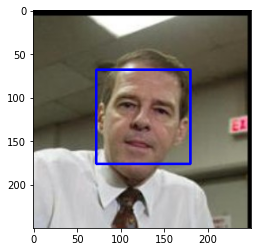

In [9]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [10]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [11]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
print('Detecting humans faces in humans photos')
humans_detected = sum(face_detector(img_path) for img_path in tqdm(human_files_short))
print('Detecting humans faces in dog photos')
dogs_misdetected = sum(face_detector(img_path) for img_path in tqdm(dog_files_short))

  3%|▎         | 3/100 [00:00<00:05, 19.00it/s]

Detecting humans faces in humans photos


  1%|          | 1/100 [00:00<00:18,  5.48it/s]

Detecting humans faces in dog photos


100%|██████████| 100/100 [01:01<00:00,  1.61it/s]


In [12]:
print(f'{humans_detected}% of the first 100 images in human_files have a detected human face')
print(f'{dogs_misdetected}% of the first 100 images in dog_files have a detected human face')

98% of the first 100 images in human_files have a detected human face
23% of the first 100 images in dog_files have a detected human face


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [13]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.
#Using the following kernel as reference: https://www.kaggle.com/wittmannf/detecting-faces-using-opencv-mtcnn-no-internet
!pip install mtcnn
from mtcnn import MTCNN
detector = MTCNN()

     |████████████████████████████████| 2.3MB 17.2MB/s 


In [14]:
def face_detector_mtcnn(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    return len(faces) > 0

In [15]:
print('Detecting humans faces in humans photos using MTCNN')
humans_detected = sum(face_detector_mtcnn(img_path) for img_path in tqdm(human_files_short, position=0, leave=True))
print('Detecting humans faces in dog photos using MTCNN')
dogs_misdetected = sum(face_detector_mtcnn(img_path) for img_path in tqdm(dog_files_short, position=0, leave=True))

  0%|          | 0/100 [00:00<?, ?it/s]

Detecting humans faces in humans photos using MTCNN


  0%|          | 0/100 [00:00<?, ?it/s]

Detecting humans faces in dog photos using MTCNN


100%|██████████| 100/100 [01:24<00:00,  1.19it/s]


In [16]:
print(f'{humans_detected}% of the first 100 images in human_files have a detected human face using MTCNN')
print(f'{dogs_misdetected}% of the first 100 images in dog_files have a detected human face using MTCNN')

100% of the first 100 images in human_files have a detected human face using MTCNN
24% of the first 100 images in dog_files have a detected human face using MTCNN


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [17]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [18]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ])

    img = Image.open(img_path)
    img = transform(img)

    # Add batch dimension
    img = img.unsqueeze(0)

    if use_cuda:
        img = img.cuda()
    
    VGG16.eval()
    pred = VGG16.forward(img)
    _, class_idx = pred.max(1)
    return class_idx.item() # predicted class index

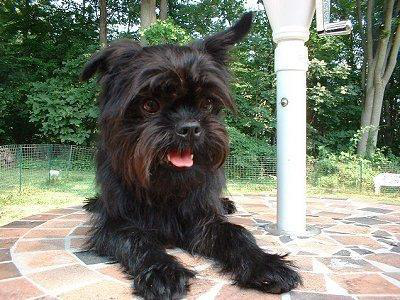

In [19]:
img_path = 'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'
img = Image.open(img_path); img

In [20]:
tr = transforms.Compose([
    transforms.Resize(224),
])

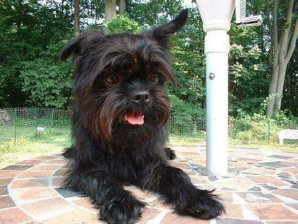

In [21]:
tr(img)

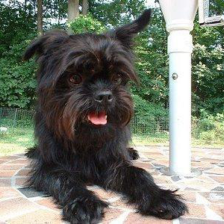

In [22]:
tr = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
])
tr(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


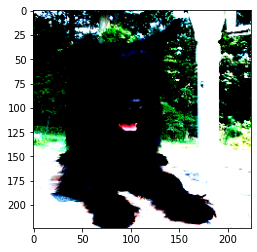

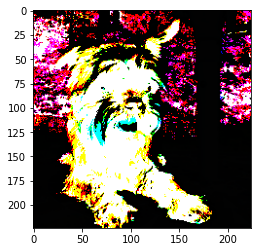

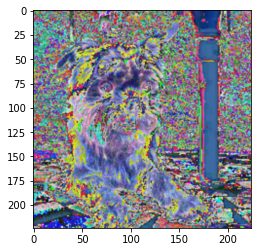

In [23]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
tr = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])
im=tr(img)
plt.imshow(im.permute(1, 2, 0))
plt.show()
plt.imshow(im.permute(1, 2, 0).numpy().astype('uint8'))
plt.show()
plt.imshow(transforms.ToPILImage()(im), interpolation='bicubic')

In [24]:
VGG16_predict(img_path) # 252 is 'affenpinscher, monkey pinscher, monkey dog'

252

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [25]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    n=VGG16_predict(img_path)
    return 151<=n<=268 # true/false

In [26]:
assert dog_detector(img_path)

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [27]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
n_dogs=sum(dog_detector(img_path) for img_path in tqdm(human_files_short, position=0, leave=True))
print(f'\n\nPercentage of humans detected as dogs: {n_dogs}%')

100%|██████████| 100/100 [00:01<00:00, 80.28it/s]



Percentage of humans detected as dogs: 0%


In [28]:
n_dogs=sum(dog_detector(img_path) for img_path in tqdm(dog_files_short, position=0, leave=True))
print(f'\n\nPercentage of dogs detected as dogs: {n_dogs}%')

100%|██████████| 100/100 [00:03<00:00, 29.50it/s]



Percentage of dogs detected as dogs: 100%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [29]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="https://github.com/WittmannF/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Brittany_02625.jpg?raw=1" width="100"> | <img src="https://github.com/WittmannF/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Welsh_springer_spaniel_08203.jpg?raw=1" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="https://github.com/WittmannF/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Curly-coated_retriever_03896.jpg?raw=1" width="200"> | <img src="https://github.com/WittmannF/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/American_water_spaniel_00648.jpg?raw=1" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="https://github.com/WittmannF/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Labrador_retriever_06457.jpg?raw=1" width="150"> | <img src="https://github.com/WittmannF/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Labrador_retriever_06455.jpg?raw=1" width="240"> | <img src="https://github.com/WittmannF/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Labrador_retriever_06449.jpg?raw=1" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [30]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
BATCH_SIZE = 32
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize])


train_set = datasets.ImageFolder("dogImages/train", transform=transform)    

train_loader = torch.utils.data.DataLoader(train_set,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

valid_set = datasets.ImageFolder("dogImages/valid", transform=transform)    

valid_loader = torch.utils.data.DataLoader(train_set,
                                          batch_size=BATCH_SIZE)

test_set = datasets.ImageFolder("dogImages/test", transform=transform)    

test_loader = torch.utils.data.DataLoader(train_set,
                                          batch_size=BATCH_SIZE)

loaders = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

In [31]:
img, label = next(iter(train_loader))

In [32]:
img.shape

torch.Size([32, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'tensor(72)')

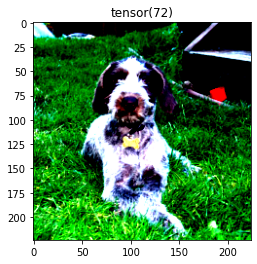

In [33]:
plt.imshow(img[0].permute(1,2,0))
plt.title(label[0])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- How does your code resize the images (by cropping, stretching, etc)?
    - Resize --> CenterCrop

- What size did you pick for the input tensor, and why?
    - 224 bc of compatibility with transfer learning models

- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?
    - No bc I want simplicity first and also bc it is computationally cheaper

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [34]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv = nn.Conv2d(3,16,5, stride=2)
        self.maxpool = nn.MaxPool2d(2,2)
        self.fc = nn.Linear(55*55*16,133)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.maxpool(F.relu(self.conv(x)))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
I want to try the simplest model first, hence just one single conv layer with stride=2 for saving computation and one maxpool 2x2

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [35]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=1e-3)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [36]:
model_scratch

Net(
  (conv): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=48400, out_features=133, bias=True)
)

In [37]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, 
          valid_loss_min=np.Inf):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            print(f'Batch id {batch_idx}, Training Loss = {train_loss}')
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)            
            #valid_loss += loss.item()*data.size(0)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
                torch.save(model.state_dict(), save_path)
                valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(3, loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Batch id 0, Training Loss = 4.943975448608398
Batch id 1, Training Loss = 4.948295593261719
Batch id 2, Training Loss = 4.981908798217773
Batch id 3, Training Loss = 4.9727301597595215
Batch id 4, Training Loss = 4.964957237243652
Batch id 5, Training Loss = 4.949488639831543
Batch id 6, Training Loss = 4.940073490142822
Batch id 7, Training Loss = 4.934928894042969
Batch id 8, Training Loss = 4.9366583824157715
Batch id 9, Training Loss = 4.935712814331055
Batch id 10, Training Loss = 4.9242024421691895
Batch id 11, Training Loss = 4.912475109100342
Batch id 12, Training Loss = 4.923529148101807
Batch id 13, Training Loss = 4.916930675506592
Batch id 14, Training Loss = 4.909549236297607
Batch id 15, Training Loss = 4.91465425491333
Batch id 16, Training Loss = 4.919293403625488
Batch id 17, Training Loss = 4.912503719329834
Batch id 18, Training Loss = 4.912452220916748
Batch id 19, Training Loss = 4.911030292510986
Batch id 20, Training Loss = 4.909446716308594
Batch id 21, Training

<All keys matched successfully>

In [38]:
criterion_scratch

CrossEntropyLoss()

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [39]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.883685


Test Accuracy: 14% (992/6680)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [40]:
## TODO: Specify data loaders
loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [41]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# define VGG16 model
model_transfer = models.vgg16(pretrained=True)

# Freeze features parameters
for param in model_transfer.features.parameters():
    param.require_grad = False
    
n_inputs = model_transfer.classifier[6].in_features

last_layer = nn.Linear(n_inputs, 133)

model_transfer.classifier[6] = last_layer

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I've chosen VGG, but replaced only te last linear layer to the output shape. The convolutional layers (feature parameters) were frozen. Hence the model will be training only the classifier weights and will be using the current VGG weights as init weights. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [42]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=4e-2)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [43]:
# train the model
# train the model
model_transfer = train(3, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Batch id 0, Training Loss = 5.242456436157227
Batch id 1, Training Loss = 5.192838668823242
Batch id 2, Training Loss = 4.9683427810668945
Batch id 3, Training Loss = 4.8819427490234375
Batch id 4, Training Loss = 4.753667831420898
Batch id 5, Training Loss = 4.5871806144714355
Batch id 6, Training Loss = 4.4332380294799805
Batch id 7, Training Loss = 4.343015193939209
Batch id 8, Training Loss = 4.16050910949707
Batch id 9, Training Loss = 4.079354763031006
Batch id 10, Training Loss = 3.981175661087036
Batch id 11, Training Loss = 3.928725242614746
Batch id 12, Training Loss = 3.9073591232299805
Batch id 13, Training Loss = 3.8305845260620117
Batch id 14, Training Loss = 3.818737030029297
Batch id 15, Training Loss = 3.7393453121185303
Batch id 16, Training Loss = 3.691922426223755
Batch id 17, Training Loss = 3.6288065910339355
Batch id 18, Training Loss = 3.564265012741089
Batch id 19, Training Loss = 3.5077905654907227
Batch id 20, Training Loss = 3.4468724727630615
Batch id 21, T

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [44]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.257862


Test Accuracy: 93% (6213/6680)


## BONUS: Transfer Learning with FastAI

In [1]:
!pip install fastai --upgrade -q

In [3]:
from fastai.vision.all import *

In [4]:
impath='/content/deep-learning-v2-pytorch/project-dog-classification/dogImages/'
get_image_files(impath, recurse=True)

(#8351) [Path('/content/deep-learning-v2-pytorch/project-dog-classification/dogImages/train/079.Great_pyrenees/Great_pyrenees_05384.jpg'),Path('/content/deep-learning-v2-pytorch/project-dog-classification/dogImages/train/079.Great_pyrenees/Great_pyrenees_05375.jpg'),Path('/content/deep-learning-v2-pytorch/project-dog-classification/dogImages/train/079.Great_pyrenees/Great_pyrenees_05397.jpg'),Path('/content/deep-learning-v2-pytorch/project-dog-classification/dogImages/train/079.Great_pyrenees/Great_pyrenees_05432.jpg'),Path('/content/deep-learning-v2-pytorch/project-dog-classification/dogImages/train/079.Great_pyrenees/Great_pyrenees_05430.jpg'),Path('/content/deep-learning-v2-pytorch/project-dog-classification/dogImages/train/079.Great_pyrenees/Great_pyrenees_05418.jpg'),Path('/content/deep-learning-v2-pytorch/project-dog-classification/dogImages/train/079.Great_pyrenees/Great_pyrenees_05385.jpg'),Path('/content/deep-learning-v2-pytorch/project-dog-classification/dogImages/train/079.G

In [10]:
dbk=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [11]:
dls=dbk.dataloaders(impath)

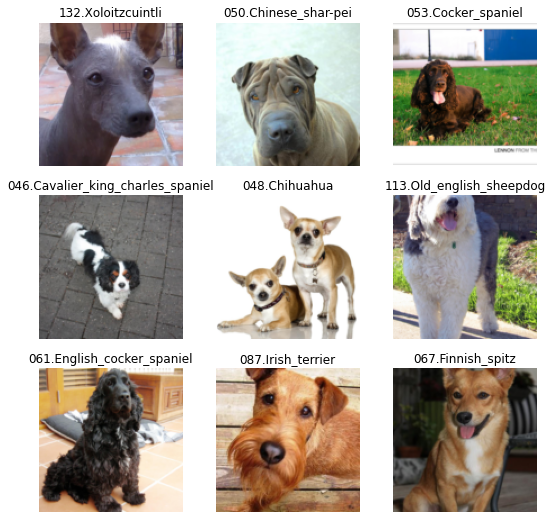

In [12]:
dls.valid.show_batch()

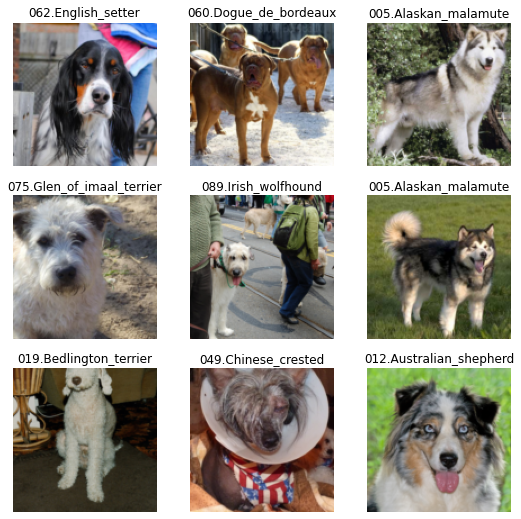

In [14]:
dls.train.show_batch()

In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [17]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.091918,2.066262,0.522754,01:11


epoch,train_loss,valid_loss,error_rate,time
0,2.012241,1.406830,0.399401,01:14
1,1.423438,1.148783,0.332335,01:13
2,0.913917,1.010480,0.298204,01:14
3,0.610056,0.980148,0.289820,01:13


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [45]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_set.classes]

def predict_breed_transfer(img_path):

    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ])
    
    
    img = Image.open(img_path)
    img = transform(img)
    # Add batch dimension
    img = img.unsqueeze(0)
    if use_cuda:
        img = img.cuda()

    model_transfer.eval()
    pred = model_transfer.forward(img)
    _, class_idx = pred.max(1)
    
    return class_names[class_idx.item()]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](https://github.com/WittmannF/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/sample_human_output.png?raw=1)


### (IMPLEMENTATION) Write your Algorithm

In [46]:
%matplotlib inline

In [47]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def visualize_transformed_img(img_path):
    im=Image.open(img_path)
    tr = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224)
    ])
    im=tr(im)
    display(im)

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    contains_human = face_detector(img_path)
    contains_dog = dog_detector(img_path)

    visualize_transformed_img(img_path)



    if contains_dog:
        print('Dog Detected, predicting breed:')
        return print(predict_breed_transfer(img_path))
    elif contains_human:
        print('Human Detected, if you were a dog, your breed would be:')
        return print(predict_breed_transfer(img_path))
    else:
        print('Neither human or dog, but if you were a dog, your breed would be:')
        return print(predict_breed_transfer(img_path))
    

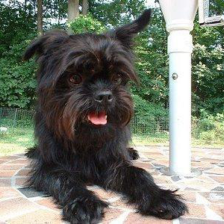

Dog Detected, predicting breed:
Affenpinscher


In [48]:
run_app(img_path)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

IMG Path: lfw/Dean_Jacek/Dean_Jacek_0001.jpg


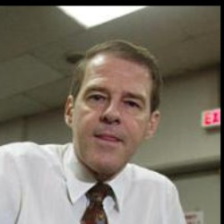

Human Detected, if you were a dog, your breed would be:
Brittany
IMG Path: lfw/Roberto_Cercelletta/Roberto_Cercelletta_0001.jpg


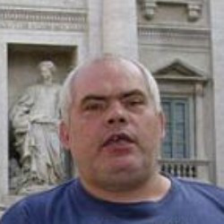

Human Detected, if you were a dog, your breed would be:
Chinese crested
IMG Path: lfw/James_Hakett/James_Hakett_0001.jpg


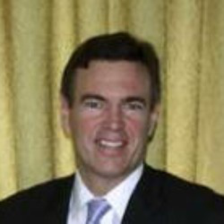

Human Detected, if you were a dog, your breed would be:
Silky terrier
IMG Path: dogImages/train/079.Great_pyrenees/Great_pyrenees_05384.jpg


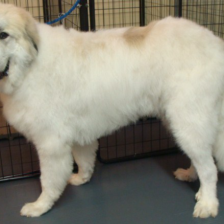

Dog Detected, predicting breed:
Kuvasz
IMG Path: dogImages/train/079.Great_pyrenees/Great_pyrenees_05375.jpg


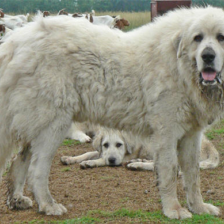

Dog Detected, predicting breed:
Great pyrenees
IMG Path: dogImages/train/079.Great_pyrenees/Great_pyrenees_05397.jpg


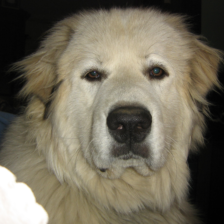

Dog Detected, predicting breed:
Great pyrenees


In [49]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for img_path in np.hstack((human_files[:3], dog_files[:3])):
    print("IMG Path:", img_path)
    run_app(img_path)
    print("="*80)

In [50]:
!wget https://raw.githubusercontent.com/WittmannF/dog-breed-classifier/master/ca3.jpeg

--2020-11-29 06:23:00--  https://raw.githubusercontent.com/WittmannF/dog-breed-classifier/master/ca3.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4689 (4.6K) [image/jpeg]
Saving to: ‘ca3.jpeg’

ca3.jpeg            100%[===================>]   4.58K  --.-KB/s    in 0s      

2020-11-29 06:23:00 (49.0 MB/s) - ‘ca3.jpeg’ saved [4689/4689]



IMG Path: ca3.jpeg


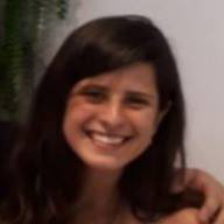

Human Detected, if you were a dog, your breed would be:
Dachshund


In [51]:
img_path='ca3.jpeg'
print("IMG Path:", img_path)
run_app(img_path)

In [52]:
img_path = '/content/20201105_awari_021 copy.jpg'

In [53]:
print("IMG Path:", img_path)
run_app(img_path)

IMG Path: /content/20201105_awari_021 copy.jpg


error: ignored

In [ ]:
img_path='/content/IMG_20190222_223419.jpg'
print("IMG Path:", img_path)
run_app(img_path)

In [ ]:
img_path='/content/IMG_20200503_123100.jpg'
print("IMG Path:", img_path)
run_app(img_path)

In [ ]:
img_path='/content/IMG_20171010_220020641.jpg'
print("IMG Path:", img_path)
run_app(img_path)